<b><h1>Petit exo de crunching de data</h1></b>

## **Setup**

In [8]:
# used libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
# loading data
cities = pd.read_csv('data_tictactrip/cities.csv')
providers = pd.read_csv('data_tictactrip/providers.csv')
stations = pd.read_csv('data_tictactrip/stations.csv')
tickets = pd.read_csv('data_tictactrip/ticket_data.csv')

## **Presentation des données**

Ma première étape dans cet exercice était de visualiser les données de façon à pouvoir comprendre leurs formats, et les liens entre les dataframes.

#### **Cities data**

In [10]:
# informations cities data 
print('Nombre de lignes: {}'.format(cities.shape[0]))
print('Nombre de colonnes: {}'.format(cities.shape[1]))
print(cities.columns)

Nombre de lignes: 8040
Nombre de colonnes: 6
Index(['id', 'local_name', 'unique_name', 'latitude', 'longitude',
       'population'],
      dtype='object')


#### **Stations Data**

In [11]:
# informations stations data 
print('Nombre de lignes: {}'.format(stations.shape[0]))
print('Nombre de colonnes: {}'.format(stations.shape[1]))
print(stations.columns)

Nombre de lignes: 11035
Nombre de colonnes: 4
Index(['id', 'unique_name', 'latitude', 'longitude'], dtype='object')


#### **Providers Data**

In [12]:
# informations providers data 
print('Nombre de lignes: {}'.format(providers.shape[0]))
print('Nombre de colonnes: {}'.format(providers.shape[1]))
print(providers.columns)

Nombre de lignes: 227
Nombre de colonnes: 10
Index(['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi',
       'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')


#### **Ticket Data**

In [13]:
# informations ticket data 
print('Nombre de lignes: {}'.format(tickets.shape[0]))
print('Nombre de colonnes: {}'.format(tickets.shape[1]))
print(tickets.columns)

Nombre de lignes: 74168
Nombre de colonnes: 12
Index(['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts',
       'price_in_cents', 'search_ts', 'middle_stations', 'other_companies',
       'o_city', 'd_city'],
      dtype='object')


Le dataframe tickets est complété par les données cities, stations, et providers. Pour cette raison, plus d'attention sera portée sur ce dataframe.

## **Fonctions**

Au cours de cet exercice, certaines fonctions sont construites facilitant les taches par la suite. Ces fonctions sont utiles pour calculer la distance par vol d'oiseau en utilisant les données de longitude et de latitude, ou pour calculer toutes les distances et les durées de chaque voyage.

In [14]:
# fonctions utilisées

# calcule la distance entre deux coordonnées
def distFromLatLon(lat1, lon1, lat2, lon2):
    # rayon de la terre en km
    radius = 6371
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    dist = math.sin(dLat/2)**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon/2)**2
    dist = 2 * math.atan2(math.sqrt(dist), math.sqrt(1-dist))
    dist = radius * dist
    
    return dist


# calcule la distance pour chaque billets achetés

def distCalc(ticket_data, city_data):
    # lon lat holders
    lat = [0,0]
    lon = [0,0]
    # dep et arr villes
    dep_data = ticket_data['o_city']
    arr_data = ticket_data['d_city']
    # all dist holders
    totalDist = np.zeros(dep_data.shape[0])
    
    # calcule des distance
    for i in range(dep_data.shape[0]):
        o_city = ticket_data['o_city'].loc[i]
        d_city = ticket_data['d_city'].loc[i]
        o_city = city_data.loc[city_data['id'] == o_city]
        d_city = city_data.loc[city_data['id'] == d_city]
        lat[0] = float(str(o_city['latitude']).split()[1])
        lon[0] = float(str(o_city['longitude']).split()[1])
        lat[1] = float(str(d_city['latitude']).split()[1])
        lon[1] = float(str(d_city['longitude']).split()[1])
        totalDist[i] = distFromLatLon(lat[0], lon[0], lat[1], lon[1])
    
    return totalDist
# cacule la durée de chaque voyage en seconde

def timeCalc(df):
    # colonnes depart et arrivée
    depTime = df['departure_ts']
    arrTime = df['arrival_ts']
    
    # temps totale
    totalTime = np.zeros(depTime.shape)
    
    # calcule du temps totale
    for i in range(depTime.shape[0]):
        dep = datetime.datetime.strptime(depTime[i][:-3], "%Y-%m-%d %H:%M:%S")
        arr = datetime.datetime.strptime(arrTime[i][:-3], "%Y-%m-%d %H:%M:%S")
        totalTime[i] = (arr - dep).total_seconds()
    return(totalTime)

# secondes to heures/minutes

def secToHour(secs):
    time = datetime.timedelta(seconds = secs)
    return time

In [15]:
# cacule des données intéressante (LONG RUN TIME)
# temps en seconde
prix = tickets['price_in_cents'] /100
totalTime = timeCalc(tickets)
print('Total time done!')
# distance en km
totalDist = distCalc(tickets, cities)
print('Total dist done!')

Total time done!
Total dist done!


### **Utilsation des données**

Les données ont ensuite été analysées, en commencent par une analyse des prix, de la durée, et de la distance des voyages individuellement. Ces données ont ensuite étaient utilisé pour comparer chaque mode de transport. Ceci nous permet d'avoir une vue et compréhension globale des données, pour ensuite pouvoir mieux comparer chaque mode de transport individuellement. 

### **Prix**

Statistique des prix (sans considérer la distance)

Prix moyen 43.83 €
Ecart-type  37.39 €
Prix minimum 3.00 €
Prix maximum 385.50 €


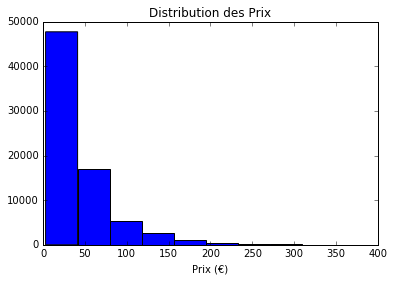

En observant la distribution des prix nous pouvons conclure que ces prix suivent une loi exponentielle. Ce qui indique que la majorité des billets sont achetés entre 3 € et 50 €


Voyage prix minimum, entre: Auxerre, Bourgogne-Franche-Comté, France
et: Clamecy, Bourgogne-Franche-Comté, France
Soit une distance de: 36.98 km (entre villes)


Voyage prix maximum, entre: London, England, United Kingdom
et: Bordeaux, Nouvelle-Aquitaine, France
Soit une distance de: 745.78 km (entre gares)


In [16]:
# selectionner la colonne prix
prix = tickets['price_in_cents']

# statistique de base
print('Statistique des prix (sans considérer la distance)\n')
moyenne = np.mean(prix)
std = np.std(prix)
minimum = np.min(prix)
maximum = np.max(prix)

print('Prix moyen {:.2f} €'.format(moyenne/100))
print('Ecart-type {: .2f} €'.format(std/100))
print('Prix minimum {:.2f} €'.format(minimum/100))
print('Prix maximum {:.2f} €'.format(maximum/100))
# distribution des données (prix)
plt.hist(prix/100)
plt.title('Distribution des Prix')
plt.xlabel('Prix (€)')
plt.show()
print('En observant la distribution des prix nous pouvons conclure que ces prix suivent une loi exponentielle. Ce qui indique que la majorité des billets sont achetés entre 3 € et 50 €')

# analyse des extremum
minimum_loc = np.argmin(prix)
maximum_loc = np.argmax(prix)

# minimum location
o_city_min = tickets['o_city'].loc[minimum_loc]
d_city_min = tickets['d_city'].loc[minimum_loc]
o_city_min = cities.loc[cities['id'] == o_city_min]
d_city_min = cities.loc[cities['id'] == d_city_min]
o_name_min = str(o_city_min['local_name']).split()[1:4]
d_name_min = str(d_city_min['local_name']).split()[1:4]
print('\n\nVoyage prix minimum, entre: {} {} {}'.format(o_name_min[0], o_name_min[1], o_name_min[2]))
print('et: {} {} {}'.format(d_name_min[0], d_name_min[1], d_name_min[2]))

# distance pour prix mini
lat_o = float(str(o_city_min['latitude']).split()[1])
lon_o = float(str(o_city_min['longitude']).split()[1])
lat_d = float(str(d_city_min['latitude']).split()[1])
lon_d = float(str(d_city_min['longitude']).split()[1])
dist = distFromLatLon(lat_o, lon_o, lat_d, lon_d)
print('Soit une distance de: {:.2f} km (entre villes)'.format(dist))

# maximum location
o_city_max = tickets['o_city'].loc[maximum_loc]
d_city_max = tickets['d_city'].loc[maximum_loc]
o_city_max = cities.loc[cities['id'] == o_city_max]
d_city_max = cities.loc[cities['id'] == d_city_max]
o_name_max = str(o_city_max['local_name']).split()[1:5]
d_name_max = str(d_city_max['local_name']).split()[1:4]
print('\n\nVoyage prix maximum, entre: {} {} {} {}'.format(o_name_max[0], o_name_max[1], o_name_max[2], o_name_max[3]))
print('et: {} {} {}'.format(d_name_max[0], d_name_max[1], d_name_max[2]))

# distance entre gares pour prix maxi
o_station_max = tickets['o_station'].loc[maximum_loc]
d_station_max = tickets['d_station'].loc[maximum_loc]
o_station_max = stations.loc[stations['id'] == o_station_max]
d_station_max = stations.loc[stations['id'] == d_station_max]
lat_o = float(str(o_station_max['latitude']).split()[1])
lon_o = float(str(o_station_max['longitude']).split()[1])
lat_d = float(str(d_station_max['latitude']).split()[1])
lon_d = float(str(d_station_max['longitude']).split()[1])
dist = distFromLatLon(lat_o, lon_o, lat_d, lon_d)
print('Soit une distance de: {:.2f} km (entre gares)'.format(dist))

### **Durée**

In [17]:
moyenne = secToHour(np.mean(totalTime))
std = secToHour(np.std(totalTime))
minimum = secToHour(np.min(totalTime))
maximum = secToHour(np.max(totalTime))

print('Durée moyenne {}'.format(moyenne))
print('Ecart-type {}'.format(std))
print('Durée minimum {}'.format(minimum))
print('Durée maximum {}'.format(maximum))

Durée moyenne 7:04:37.247600
Ecart-type 9:54:58.640688
Durée minimum 0:20:00
Durée maximum 20 days, 12:51:00


### **Distance**

In [18]:
moyenne = np.mean(totalDist)
std = np.std(totalDist)
minimum = np.min(totalDist)
maximum = np.max(totalDist)

print('Distance moyenne {:.2f} km'.format(moyenne))
print('Ecart-type {:.2f} km'.format(std))
print('Distance minimum {:.2f} km'.format(minimum))
print('Distance maximum {:.2f} km'.format(maximum))

# calcule du prix par km en €/km
prix_km = np.divide(prix, totalDist)

moyenne = np.mean(prix_km)
std = np.std(prix_km)
minimum = np.min(prix_km)
maximum = np.max(prix_km)
print('\n')
print('Prix au km en moyenne {:.2f} €/km'.format(moyenne))
print('Ecart-type {:.2f} €/km'.format(std))
print('Prix au km minimum {:.2f} €/km'.format(minimum))
print('Prix au km maximum {:.2f} €/km'.format(maximum))

Distance moyenne 363.04 km
Ecart-type 194.93 km
Distance minimum 18.91 km
Distance maximum 1870.17 km


Prix au km en moyenne 12.40 €/km
Ecart-type 9.19 €/km
Prix au km minimum 2.12 €/km
Prix au km maximum 488.35 €/km


### **Comparatif des modes de transport**

Le comparatif des modes de transport se divise en deux parties d'abord une présentation des modes de transport individuellement, puis une comparaison des modes de transport en prenant en compte 4 tranches de distance (0-200 km, 200-800 km, 800-1500 km, 1500+ km). Ceci permet d'avoir une compréhension plus complète de chaque mode de transport.

In [19]:
# calcules des stats pour chaque mode de transport (LONG RUN TIME)
transport_id = tickets['company']

# dict pour info sur transport
types = {'bus':0, 'train':0, 'carpooling':0}
# pour sats sur prix et distance
prix_bus = np.zeros((0))
prix_train = np.zeros((0))
prix_covoit = np.zeros((0))
dist_bus = np.zeros((0))
dist_train = np.zeros((0))
dist_covoit = np.zeros((0))
durée_bus = np.zeros((0))
durée_train = np.zeros((0))
durée_covoit = np.zeros((0))
# calcule du nombre d'utilisation de chaque mode de transport
for i in range(transport_id.shape[0]):
    
    transport_info = str(providers.loc[providers['id'] == transport_id[i]]['transport_type']).split()[1]
    types[transport_info] += 1
    
    if transport_info == 'bus':
        prix_bus = np.append(prix_bus, prix[i])
        durée_bus = np.append(durée_bus, totalTime[i])
        dist_bus = np.append(dist_bus, totalDist[i])
    elif transport_info == 'train':
        prix_train = np.append(prix_train, prix[i])
        durée_train = np.append(durée_train, totalTime[i])
        dist_train = np.append(dist_train, totalDist[i])
    elif transport_info == 'carpooling':
        prix_covoit = np.append(prix_covoit, prix[i])
        durée_covoit = np.append(durée_covoit, totalTime[i])
        dist_covoit = np.append(dist_covoit, totalDist[i])
        
    else:
        print('Unknown transport type')


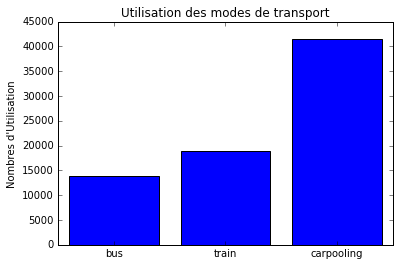

{'bus': 13798, 'train': 18929, 'carpooling': 41441}

Infos générale sur les trois modes de transport:


Prix bus moyen: 3652.45 €
Distance moyenne en bus: 474.42 km
Prix au km moyen pour le bus: 9.20 €/km
Durée moyenne du bus: 15:37:59.769532

Prix train moyen: 8506.63 €
Distance moyenne en train: 405.24 km
Prix au km moyen pour le train: 22.38 €/km
Durée moyenne du train: 7:20:03.435998

Prix covoit moyen: 2742.17 €
Distance moyenne en covoit: 306.68 km
Prix au km moyen pour le covoit: 8.91 €/km
Durée moyenne du covoit: 4:06:38.330156


In [20]:
# plot de l'utilisation des modes de transport
plt.bar(range(len(types)), list(types.values()), align='center')
plt.title('Utilisation des modes de transport')
plt.ylabel("Nombres d'Utilisation")
plt.xticks(range(len(types)), list(types.keys()))
plt.show()

print(types)
print('\nInfos générale sur les trois modes de transport:\n')
# bus data
prix_bus_moyen = np.mean(prix_bus)
dist_bus_moyen = np.mean(dist_bus)
prix_km_bus = np.mean(np.divide(prix_bus, dist_bus))
durée_bus_moyen = np.mean(durée_bus)
print('\nPrix bus moyen: {:.2f} €'.format(prix_bus_moyen))
print('Distance moyenne en bus: {:.2f} km'.format(dist_bus_moyen))
print('Prix au km moyen pour le bus: {:.2f} €/km'.format(prix_km_bus))
print('Durée moyenne du bus: {}'.format(secToHour(durée_bus_moyen)))
# train data
prix_train_moyen = np.mean(prix_train)
dist_train_moyen = np.mean(dist_train)
prix_km_train = np.mean(np.divide(prix_train, dist_train))
durée_train_moyen = np.mean(durée_train)
print('\nPrix train moyen: {:.2f} €'.format(prix_train_moyen))
print('Distance moyenne en train: {:.2f} km'.format(dist_train_moyen))
print('Prix au km moyen pour le train: {:.2f} €/km'.format(prix_km_train))
print('Durée moyenne du train: {}'.format(secToHour(durée_train_moyen)))
# carpooling data
prix_covoit_moyen = np.mean(prix_covoit)
dist_covoit_moyen = np.mean(dist_covoit)
prix_km_covoit = np.mean(np.divide(prix_covoit, dist_covoit))
durée_covoit_moyen = np.mean(durée_covoit)
print('\nPrix covoit moyen: {:.2f} €'.format(prix_covoit_moyen))
print('Distance moyenne en covoit: {:.2f} km'.format(dist_covoit_moyen))
print('Prix au km moyen pour le covoit: {:.2f} €/km'.format(prix_km_covoit))
print('Durée moyenne du covoit: {}'.format(secToHour(durée_covoit_moyen)))

### **Comparatif des modes de transport avec tranches de distance**

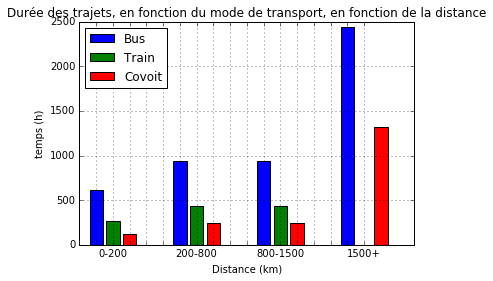

Il n'y a pas de donnée pour plus de 1500 km pour le train


In [21]:
x_axis_label = ['','','0-200','','','','', '200-800','','','','', '800-1500','','','','', '1500+']
x_axis = [[1,6,11,16],[2,7,12,17],[3,8,13,18]]
durée = np.zeros((4,3))
# 0-200 km calcules
bus_0 = dist_bus < 200
train_0 = dist_train < 200
covoit_0 = dist_covoit < 200
# durée 0-200 moyenne
durée[0,0] = np.mean(durée_bus[bus_0])
durée[0,1] = np.mean(durée_train[train_0])
durée[0,2] = np.mean(durée_covoit[covoit_0])

# 200-800 km calcules
bus_200 = (dist_bus > 200) | (dist_bus<=800)
train_200 = (dist_train > 200) | (dist_train<=800)
covoit_200 = (dist_covoit > 200) | (dist_covoit<=800)
# durée 200-800 moyenne
durée[1,0] = np.mean(durée_bus[bus_200])
durée[1,1] = np.mean(durée_train[train_200])
durée[1,2] = np.mean(durée_covoit[covoit_200])

# 800-2000km calcules
bus_800 = (dist_bus > 800) | (dist_bus<=1500)
train_800 = (dist_train > 800) | (dist_train<=1500)
covoit_800 = (dist_covoit > 800) | (dist_covoit<=1500)
# durée 800-2000 moyenne
durée[2,0] = np.mean(durée_bus[bus_800])
durée[2,1] = np.mean(durée_train[train_800])
durée[2,2] = np.mean(durée_covoit[covoit_800])

#2000+ km calcules
bus_1500= dist_bus > 1500
train_1500 = dist_train > 1500
covoit_1500 = dist_covoit > 1500
# durée 2000+ moyenne
durée[3,0] = np.mean(durée_bus[bus_1500])
durée[3,1] = np.mean(durée_train[train_1500])
durée[3,2] = np.mean(durée_covoit[covoit_1500])
durée = np.nan_to_num(durée)

# plot durée vs distance
plt.bar(x_axis[0],durée[:,0]/60, align='center')
plt.bar(x_axis[1],durée[:,1]/60, color='g',align='center')
plt.bar(x_axis[2],durée[:,2]/60, color='r',align='center')
plt.xticks(range(18), x_axis_label)
plt.title('Durée des trajets, en fonction du mode de transport, en fonction de la distance')
plt.ylabel('temps (h)')
plt.xlabel('Distance (km)')
plt.legend(['Bus','Train','Covoit'],loc='upper left')
plt.grid(True)
plt.show()
print("Il n'y a pas de donnée pour plus de 1500 km pour le train")

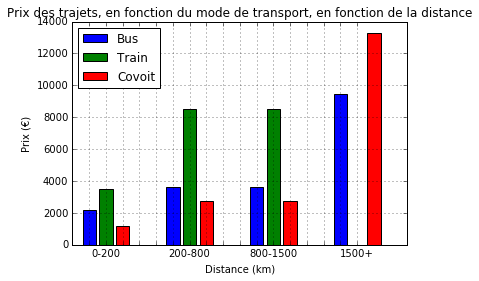

Il n'y a pas de donnée pour plus de 1500 km pour le train


In [22]:
x_axis_label = ['','','0-200','','','','', '200-800','','','','', '800-1500','','','','', '1500+']
x_axis = [[1,6,11,16],[2,7,12,17],[3,8,13,18]]
prix_distance = np.zeros((4,3))

# prix 0-200 moyenne
prix_distance[0,0] = np.mean(prix_bus[bus_0])
prix_distance[0,1] = np.mean(prix_train[train_0])
prix_distance[0,2] = np.mean(prix_covoit[covoit_0])

# prix 200-800 moyenne
prix_distance[1,0] = np.mean(prix_bus[bus_200])
prix_distance[1,1] = np.mean(prix_train[train_200])
prix_distance[1,2] = np.mean(prix_covoit[covoit_200])

# prix 800-1500 moyenne
prix_distance[2,0] = np.mean(prix_bus[bus_800])
prix_distance[2,1] = np.mean(prix_train[train_800])
prix_distance[2,2] = np.mean(prix_covoit[covoit_800])

# prix 1500+ moyenne
prix_distance[3,0] = np.mean(prix_bus[bus_1500])
prix_distance[3,1] = np.mean(prix_train[train_1500])
prix_distance[3,2] = np.mean(prix_covoit[covoit_1500])
prix_distance = np.nan_to_num(prix_distance)

# plot prix vs distance
plt.bar(x_axis[0],prix_distance[:,0], align='center')
plt.bar(x_axis[1],prix_distance[:,1], color='g',align='center')
plt.bar(x_axis[2],prix_distance[:,2], color='r',align='center')
plt.xticks(range(18), x_axis_label)
plt.title('Prix des trajets, en fonction du mode de transport, en fonction de la distance')
plt.ylabel('Prix (€)')
plt.xlabel('Distance (km)')
plt.legend(['Bus','Train','Covoit'],loc='upper left')
plt.grid(True)
plt.show()
print("Il n'y a pas de donnée pour plus de 1500 km pour le train")